In [147]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [114]:
df = pd.read_csv('cars.csv')

# EDA 

In [115]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.50,6.00,265.00,17.00,23.00,"4,451.00",106.00,189.00
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.00,4.00,200.00,24.00,31.00,"2,778.00",101.00,172.00
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.40,4.00,200.00,22.00,29.00,"3,230.00",105.00,183.00
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.20,6.00,270.00,20.00,28.00,"3,575.00",108.00,186.00
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.50,6.00,225.00,18.00,24.00,"3,880.00",115.00,197.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.40,5.00,197.00,21.00,28.00,"3,450.00",105.00,186.00
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.30,5.00,242.00,20.00,26.00,"3,450.00",105.00,186.00
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.90,6.00,268.00,19.00,26.00,"3,653.00",110.00,190.00
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.90,4.00,170.00,22.00,29.00,"2,822.00",101.00,180.00


In [116]:
# rename column from MSRP to price
df.rename(columns = {'MSRP' : 'price'}, inplace = True)

In [117]:
df.shape

(432, 15)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   price        428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [119]:
df.describe(include=['O']) #just for object

,Make,Model,Type,Origin,DriveTrain,price,Invoice
count,428,428,428,428,428,428,428
unique,38,425,6,3,3,410,425
top,Toyota,G35 4dr,Sedan,Asia,Front,"$33,995","$19,638"
freq,28,2,262,158,226,2,2


In [120]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe() #just for float

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.00,426.00,428.00,428.00,428.00,428.00,428.00,428.00
mean,3.20,5.81,215.89,20.06,26.84,"3,577.95",108.15,186.36
std,1.11,1.56,71.84,5.24,5.74,758.98,8.31,14.36
min,1.30,3.00,73.00,10.00,12.00,"1,850.00",89.00,143.00
25%,2.38,4.00,165.00,17.00,24.00,"3,104.00",103.00,178.00
50%,3.00,6.00,210.00,19.00,26.00,"3,474.50",107.00,187.00
75%,3.90,6.00,255.00,21.25,29.00,"3,977.75",112.00,194.00
max,8.30,12.00,500.00,60.00,66.00,"7,190.00",144.00,238.00


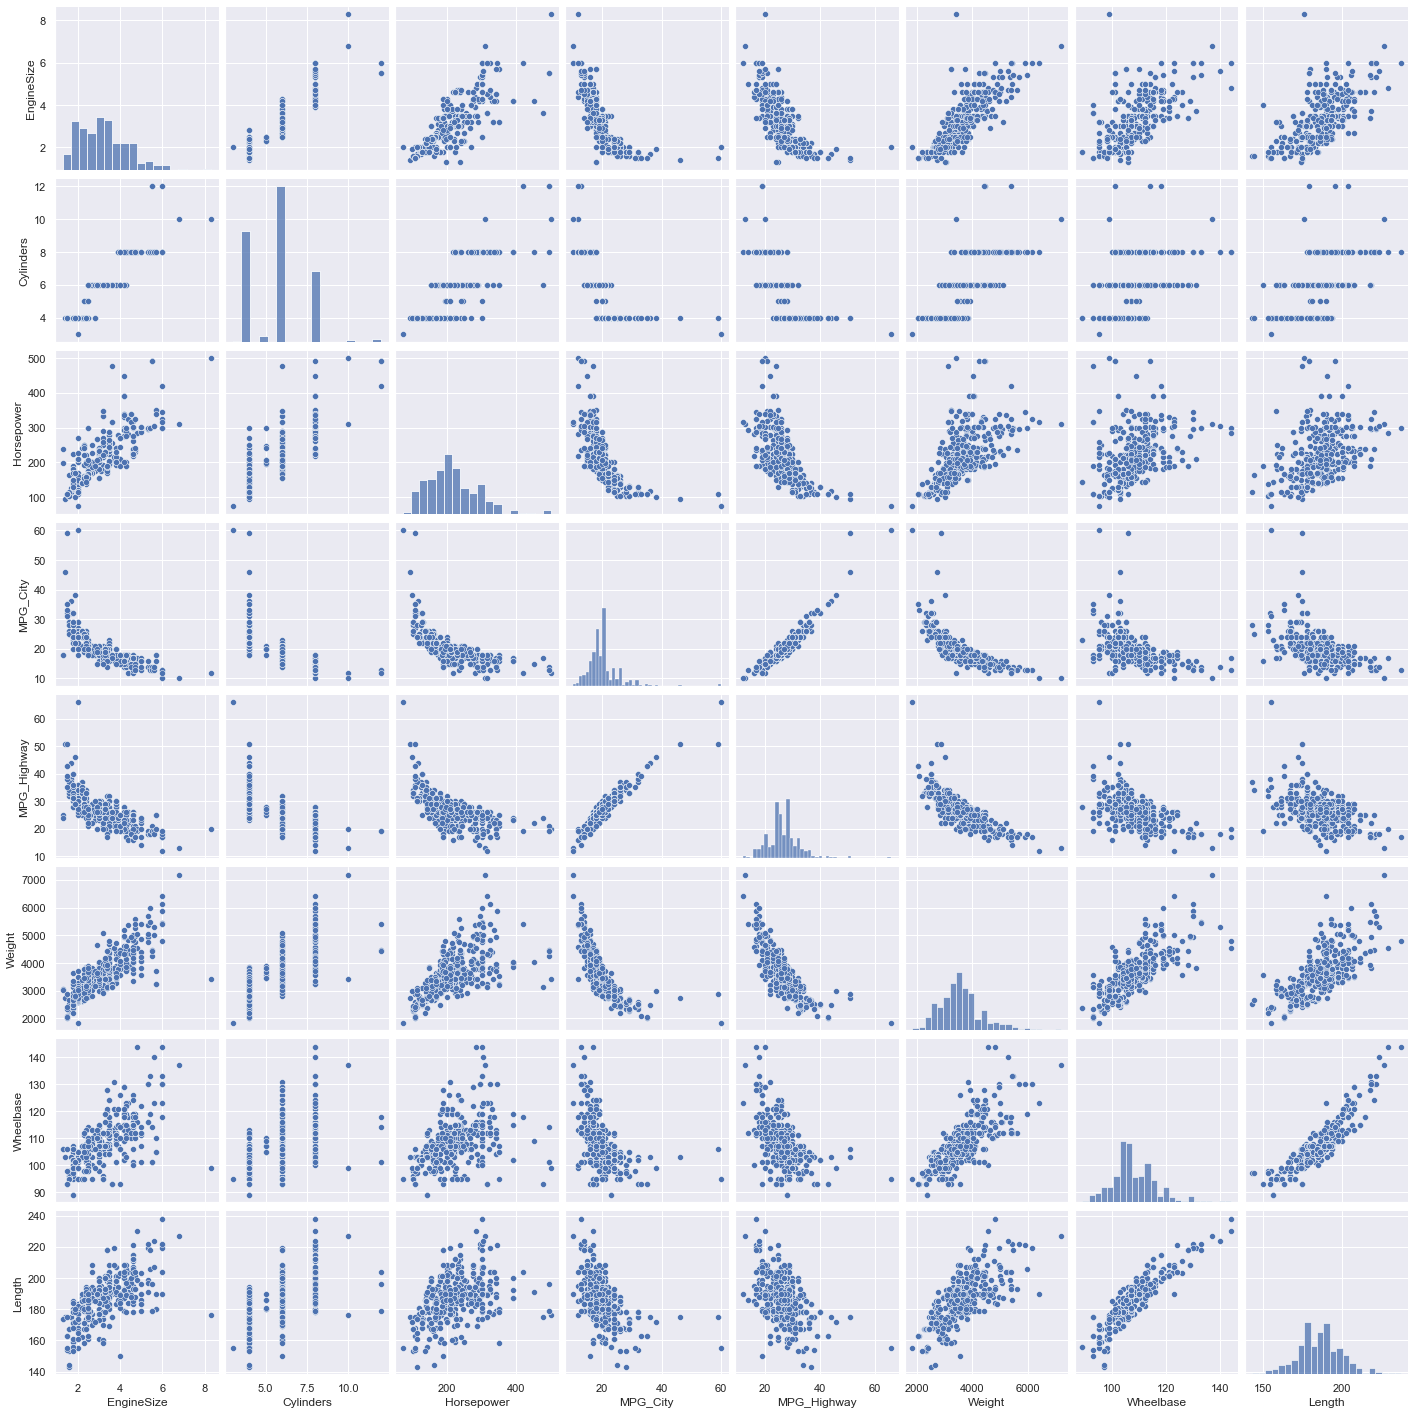

In [124]:
sns.pairplot(df)
plt.show()

In [125]:
df.corr()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.00,0.91,0.79,-0.71,-0.72,0.81,0.64,0.64
Cylinders,0.91,1.00,0.81,-0.68,-0.68,0.74,0.55,0.55
Horsepower,0.79,0.81,1.00,-0.68,-0.65,0.63,0.39,0.38
MPG_City,-0.71,-0.68,-0.68,1.00,0.94,-0.74,-0.51,-0.50
MPG_Highway,-0.72,-0.68,-0.65,0.94,1.00,-0.79,-0.52,-0.47
Weight,0.81,0.74,0.63,-0.74,-0.79,1.00,0.76,0.69
Wheelbase,0.64,0.55,0.39,-0.51,-0.52,0.76,1.00,0.89
Length,0.64,0.55,0.38,-0.50,-0.47,0.69,0.89,1.00


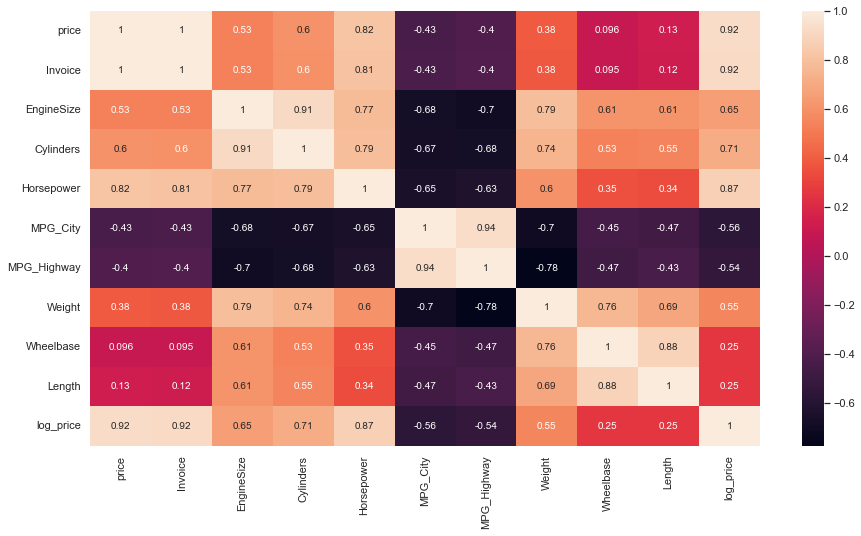

In [126]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df_train.corr(), annot = True)

In [127]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Make : 38
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Name: Make, dtype: int64

********************

Model : 425
G35 4dr         2
C320 4dr        2
C240 4dr        2
MDX             1
Marauder 4dr    1
Name: Model, dtype: int64

********************

Type : 6
Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Name: Type, dtype: int64

********************

Origin : 3
Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

********************

DriveTrain : 3
Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

********************

price : 410
$33,995     2
$21,595     2
$29,995     2
$28,495     2
$23,495     2
Name: price, dtype: int64

********************

Invoice : 425
$19,638     2
$68,306     2
$14,207     2
$33,337     1
$28,318     1
Name: Invoice, dtype: int64

********************

EngineSize : 43
3.00    42
3.50    34
2.00    30
2.50    26
2.40    23
Name: EngineSize

# Cleaning and processing

> Dealing with missing data

In [128]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
price          4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

<AxesSubplot:>

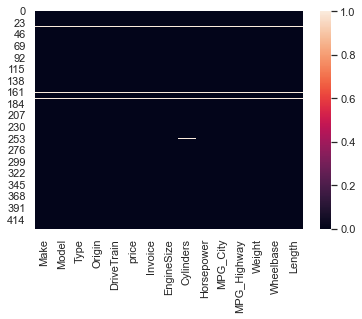

In [129]:
sns.heatmap(df.isnull())

In [130]:
df = df.dropna()

In [131]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
price          0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

# Convert object data to float 

In [132]:
df['price'] = df['price'].str.replace("$", "").str.replace(",", "").astype(float)

C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\2132154466.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace("$", "").str.replace(",", "").astype(float)
C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\2132154466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace("$", "").str.replace(",", "").astype(float)


In [133]:
df['Invoice'] = df['Invoice'].str.replace("$", "").str.replace(",", "").astype(float)

C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\1592894560.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Invoice'] = df['Invoice'].str.replace("$", "").str.replace(",", "").astype(float)
C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\1592894560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice'] = df['Invoice'].str.replace("$", "").str.replace(",", "").astype(float)


In [134]:
# Check for outliers in numerical variables
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Outliers: ", outliers.sum().sum())

Outliers:  165


C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\1031750019.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [135]:
# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\AHMED\AppData\Local\Temp\ipykernel_8788\464505283.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [136]:
# Categorical Data to Numerical Data
# Convert Make, Model, Type, Origin, and DriveTrain columns to numerical data
categorical_cols = ['Make', 'Model', 'Type', 'Origin', 'DriveTrain']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [138]:
# Features Selection
# Select top 30% features based on percentile
X = df.drop(['price'], axis=1)
y = df['price']
selector = SelectPercentile(percentile=30)
selector.fit(X, y)
X_new = selector.transform(X)

In [141]:
# Split Data to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [148]:
# Use Ridge Algorithm
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RidgeRegressionModel.fit(X_train, y_train)


Ridge(random_state=33)

In [149]:
#Calculating Details
print('Ridge Regression Train Score is : ' , RidgeRegressionModel.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , RidgeRegressionModel.score(X_test, y_test))
print('Ridge Regression Coef is : ' , RidgeRegressionModel.coef_)
print('Ridge Regression intercept is : ' , RidgeRegressionModel.intercept_)


Ridge Regression Train Score is :  0.9968311913646852
Ridge Regression Test Score is :  0.9975671470695556
Ridge Regression Coef is :  [-29.61358663   1.09235491 186.82029147  46.93460211]
Ridge Regression intercept is :  -901.3196968439843


In [150]:
#Calculating Prediction
y_pred = RidgeRegressionModel.predict(X_test)

In [151]:
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])


Predicted Value for Linear Regression is :  [18835.44008113 21539.82437794 27034.68765373 16379.9178867
 25270.75615629 35120.23446194 27506.09019302 40106.56342651
 17321.61413847 56518.57665143]


In [152]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # average error of values
print('Mean Absolute Error Value is : ', MAEValue)


Mean Absolute Error Value is :  364.9325278435951


In [153]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)


Mean Squared Error Value is :  312583.51248125726


In [154]:
#Calculating Root mean Squared Error
print('Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, y_pred)))


Root Mean Squared Error is :  559.091685219211


In [155]:
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )


Median Squared Error Value is :  195.46962684455502


In [156]:
RValue = r2_score(y_test, y_pred)
print('R-squared Error Value is : ', RValue )

R-squared Error Value is :  0.997566567520648


# reference : https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/